https://www.mdpi.com/1424-8220/19/22/4933/htm

Tensorflow achitecture works in three parts:
- Preprocessing the data
- Build the model
- Train and estimate the model

### Import the Fashion MNIST dataset
Fashion-MNIST dataset contains 70,000 grayscale images(28x28) in 10 categories. 

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
np.max(X_train), np.m(X_train)

(255, 72.94035223214286)

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Category https://github.com/zalandoresearch/fashion-mnist

In [9]:
class_names = ['top','trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag','ankle boot']

### Exploring the data

In [10]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

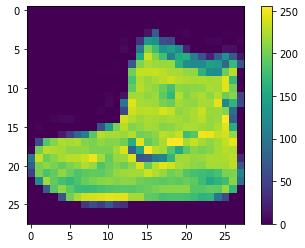

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

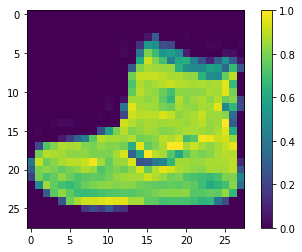

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

Now the value is between 0 to 1 for training our NN

### Build the model with TF2.0

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [30]:
model = Sequential()
model.add(Flatten(input_shape = (28,28))) # this will fit the data into 1d
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


flatten 2d to 1d in dense layer 784*128

#### Model Compilation
- Loss Function : error is minimized
- Optimizer
- Metrics

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5012 - accuracy: 0.8244
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3775 - accuracy: 0.8637
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3391 - accuracy: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3138 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2958 - accuracy: 0.8912
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2806 - accuracy: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2682 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2573 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2478 - accuracy: 0.9069
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8831


Overfitting of our model acc in model 0.9117 and in test its 0.8880

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_pred = model.predict_classes(X_test)

In [23]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred)

0.8831

In [25]:
pred = model.predict(X_test)
pred

array([[1.7616212e-06, 4.9540798e-09, 9.2700453e-10, ..., 2.4866711e-02,
        3.2372338e-07, 9.7477847e-01],
       [9.0146577e-06, 1.2422395e-11, 9.9967062e-01, ..., 4.1590094e-14,
        3.3161220e-11, 2.0684944e-14],
       [5.3309517e-09, 1.0000000e+00, 7.5806792e-14, ..., 7.7775989e-28,
        8.7530823e-17, 3.4889761e-20],
       ...,
       [3.0180563e-05, 1.6096510e-13, 5.2300186e-07, ..., 9.5887231e-10,
        9.9994218e-01, 9.4750087e-13],
       [1.2596297e-09, 9.9999702e-01, 9.0465326e-12, ..., 7.2899267e-14,
        2.8187200e-14, 4.1010381e-12],
       [1.0971805e-05, 8.6830835e-07, 2.9452417e-06, ..., 3.0533911e-03,
        5.0411854e-05, 1.4913445e-05]], dtype=float32)

In [26]:
pred[0]

array([1.7616212e-06, 4.9540798e-09, 9.2700453e-10, 5.5589564e-11,
       1.3275131e-09, 3.5249582e-04, 2.7347656e-07, 2.4866711e-02,
       3.2372338e-07, 9.7477847e-01], dtype=float32)

In [27]:
np.argmax(pred[0])

9

In [28]:
np.argmax(pred[1])

2

### Now Plotting Learning Curve and Confusion Matrix

In [29]:
#help(model)

In [33]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 10, validation_split=0.2, verbose =1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 300us/sample - loss: 0.4962 - accuracy: 0.8214 - val_loss: 0.3986 - val_accuracy: 0.8594
Epoch 2/10
48000/48000 [==============================] - 13s 270us/sample - loss: 0.3755 - accuracy: 0.8633 - val_loss: 0.3708 - val_accuracy: 0.8706
Epoch 3/10
48000/48000 [==============================] - 13s 279us/sample - loss: 0.3367 - accuracy: 0.8754 - val_loss: 0.3758 - val_accuracy: 0.8674
Epoch 4/10
48000/48000 [==============================] - 13s 275us/sample - loss: 0.3127 - accuracy: 0.8853 - val_loss: 0.3545 - val_accuracy: 0.8733
Epoch 5/10
48000/48000 [==============================] - 13s 279us/sample - loss: 0.2949 - accuracy: 0.8903 - val_loss: 0.3311 - val_accuracy: 0.8808
Epoch 6/10
48000/48000 [==============================] - 14s 283us/sample - loss: 0.2811 - accuracy: 0.8956 - val_loss: 0.3272 - val_accuracy: 0.8834
Epoch 7/10
48000/48000 [====================

In [34]:
history.history

{'loss': [0.4962459971661641,
  0.37551226094433027,
  0.33671872213385845,
  0.3126612681804302,
  0.29489436860540685,
  0.28112446440591154,
  0.2685995325358514,
  0.2608944229941699,
  0.24837473399965043,
  0.2418678806865217],
 'accuracy': [0.8214375,
  0.8632708,
  0.8754375,
  0.8852917,
  0.8902708,
  0.895625,
  0.900125,
  0.9028958,
  0.9071875,
  0.9085],
 'val_loss': [0.3985768614918925,
  0.3707811246220566,
  0.3758161260546573,
  0.3545288873832518,
  0.3311324655159357,
  0.32721742554364025,
  0.33096666022519156,
  0.30882566246039156,
  0.347560996150678,
  0.333619675560476],
 'val_accuracy': [0.85941666,
  0.87058336,
  0.8674167,
  0.87333333,
  0.8808333,
  0.88341665,
  0.8839167,
  0.89316666,
  0.8815,
  0.88666666]}

In [35]:
import matplotlib.pyplot as plt

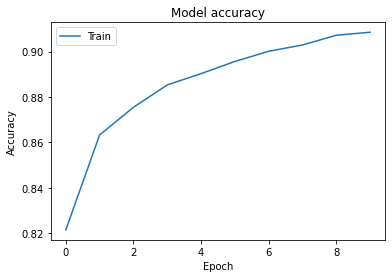

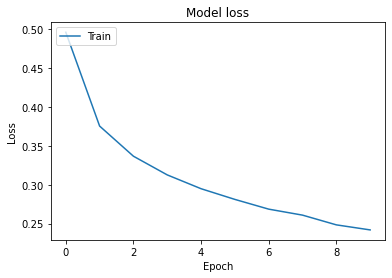

In [36]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

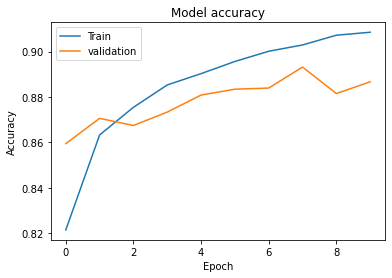

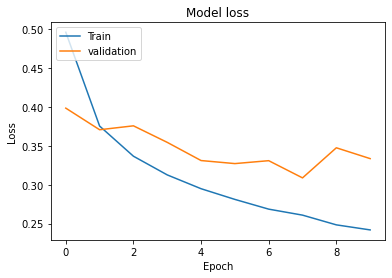

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
y_pred = model.predict_classes(X_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [40]:
accuracy_score(y_test, y_pred)

0.88

### Plot confusion matrix

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [46]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

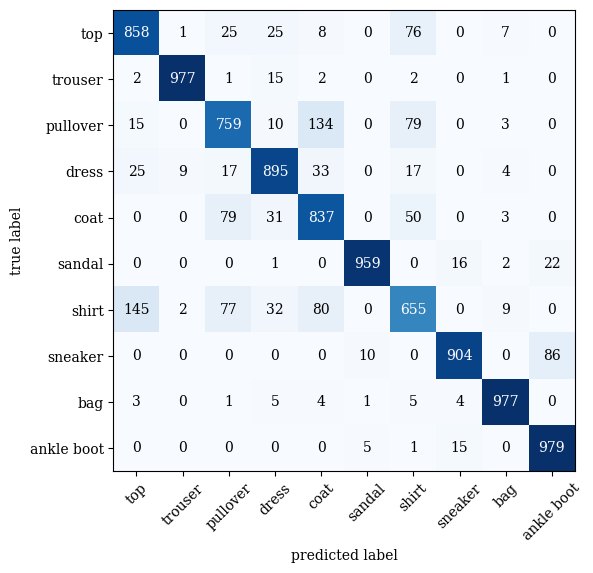

In [50]:
plt.rc('font', family='Serif')

mat = confusion_matrix(y_test, y_pred)
fig, ax  = plot_confusion_matrix(conf_mat=mat, figsize=(6,6), class_names = class_names, show_normed = False)
plt.tight_layout()
#fig.savefig('cm.png')

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214cc88be08>)

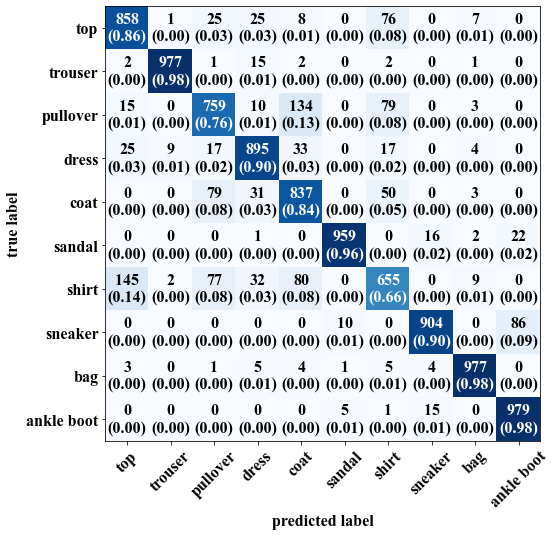

In [45]:
font = {
    'family': 'Times New Roman',
    'weight': 'bold',
    'size': 16
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8), class_names = class_names, show_normed =True)